In [78]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data (1).csv', sep = ',', encoding='latin-1')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Задача 
        Постройте графики
        Назовите графики
        Сделайте именование оси x и оси y
        Сделайте выводы

### 1.1 Изучите стоимости недвижимости

In [79]:
data = df.groupby('price')['price'].agg(count='count').reset_index().sort_values(by='count')
data

,price,count
0,75000.0,1
2385,607010.0,1
2388,608095.0,1
2389,608250.0,1
2390,608500.0,1
...,...,...
1541,425000.0,150
1923,500000.0,152
2150,550000.0,159
1113,350000.0,172


In [80]:
df['price'].describe()




count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

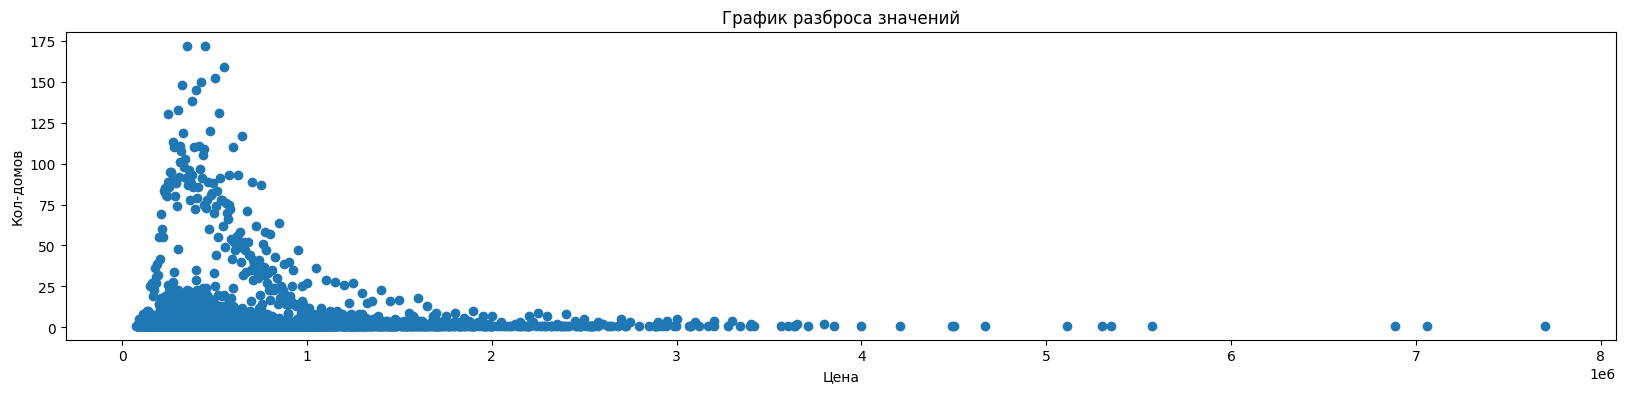

In [81]:
plt.figure(figsize=(20, 4))

plt.scatter(data['price'], data['count'])

plt.title('График разброса значений')
plt.xlabel('Цена')
plt.ylabel('Кол-домов');

#### Вывод
Исходя из полученных данных, можносделать несколькоо выводов о стоимости недвижимости:

   максимальная стоимость  7700000.0, 
   минимальная - 75000.0, 
   средняя -540088
   
   25%  стоит меньше   3.219500e+05

   50%  стоит меньше   4.500000e+05
   
   75%  стоит меньше   6.450000e+05 

в принципе распределение можно считать нормальным   

### 1.2 Изучите распределение квадратуры жилой

In [82]:
df['sqft_living15'].describe()

count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

In [83]:
data1 = df.groupby('sqft_living15')['price'].agg(count='count').reset_index().sort_values(by='sqft_living15')
data1

,sqft_living15,count
0,399,1
1,460,2
2,620,2
3,670,1
4,690,2
...,...,...
772,5600,1
773,5610,1
774,5790,6
775,6110,1


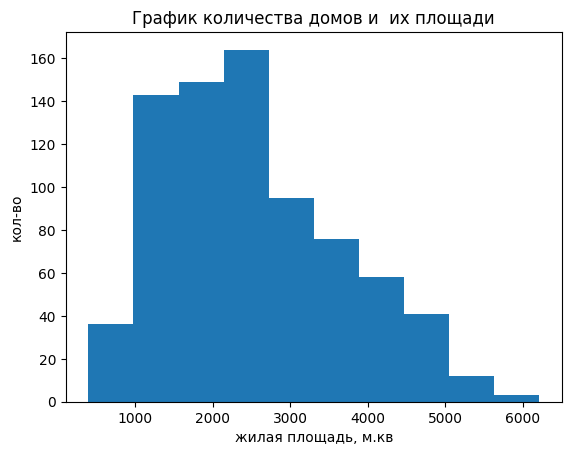

In [84]:
plt.hist(data1['sqft_living15'])
plt.xlabel('жилая площадь, м.кв')
plt.ylabel('кол-во')
plt.title('График количества домов и  их площади');

#### вывод
средняя жилая площадь составляет - 1986, минимальная 399, максимальная - 6210
 исходя из графика видно, что основное распределение площади находится в пределах от 399 до 5500

 75% домов имеют площадь в пределах 2360

## Условие 2: 

### 2.1 Изучите распределение домов от наличия вида на набережную


In [85]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
data

no     21450
yes      163
Name: waterfront, dtype: int64

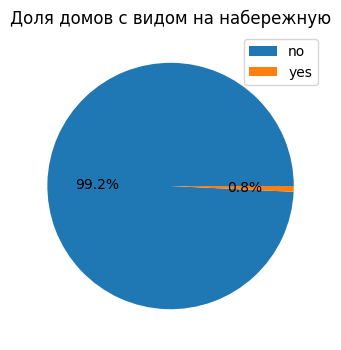

In [86]:
plt.figure(figsize=(6, 4))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля домов с видом на набережную')
plt.legend(data.index);

#### Вывод
Исходя из графика видно, что всего 0,8% домов имеют вид на набережную 

### 2.2 Изучите распределение этажей домов

In [87]:
data = df['floors'].value_counts().reset_index()
data

,index,floors
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


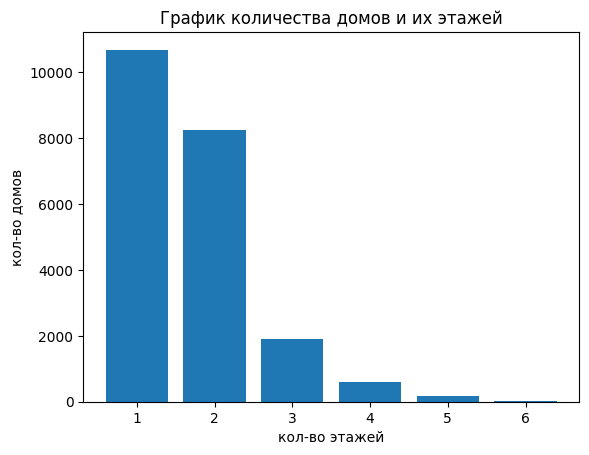

In [88]:


plt.bar(data.index+1, data.floors)

plt.title('График количества домов и их этажей')
plt.xlabel('кол-во этажей')
plt.ylabel('кол-во домов');


# plt.hist(df['floors'], bins=20)
# plt.xlabel('кол-во этажей')
# plt.ylabel('кол-во домов')
# plt.title('График количества домов и их этажей');

#### Вывод
исходя из диаграммы видно, что самое мольшое количество одноэтажных домов, на втором месте 2-этажные и наименьшее количество 3,5

### 2.3 Изучите распределение состояния домов

In [89]:
data = df['condition'].value_counts().reset_index()
data


,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


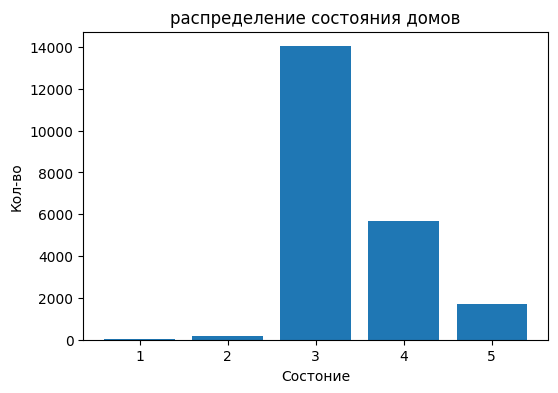

In [90]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['condition'])

plt.title('распределение состояния домов')
plt.xlabel('Состоние')
plt.ylabel('Кол-во');

#### Вывод
Исход из диагрыммы, мы видим, что  состояние домов удовлетворительное и  только 202 дома имеют озенки 1 и 2, максиальное количество домов имеют среднюю оценку

### 2.4 Изучите распределение года постройки

In [91]:
data = df['yr_built'].value_counts().sort_values().reset_index()
data

,index,yr_built
0,1934,21
1,1935,24
2,1902,27
3,1901,29
4,1933,30
...,...,...
111,2003,422
112,2004,433
113,2005,450
114,2006,454


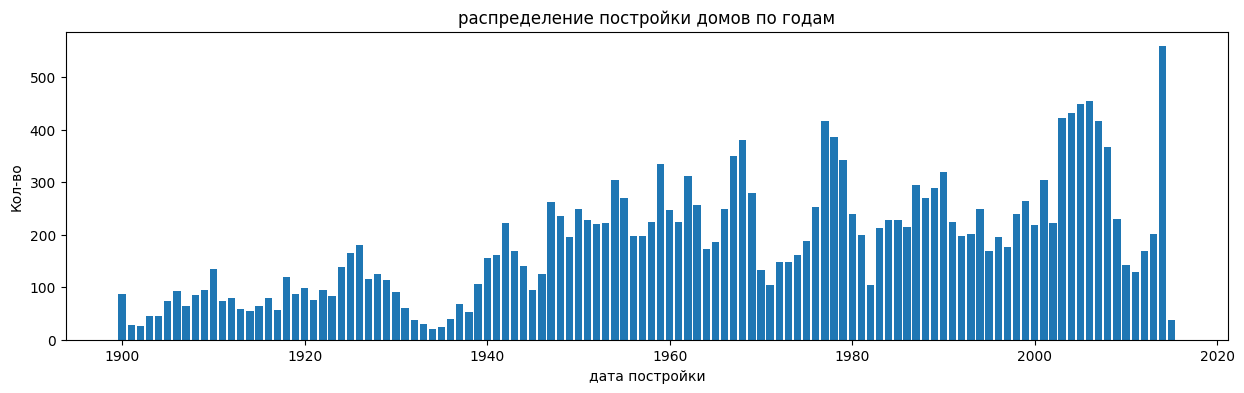

In [92]:
plt.figure(figsize=(15, 4))

plt.bar(data['index'], data['yr_built'])

plt.title('распределение постройки домов по годам')
plt.xlabel('дата постройки')
plt.ylabel('Кол-во');

#### Вывод
по графику можно заметить, что основной этап застройки начался после 40х годов и в среднем в год строилось от 200 до 300 домов

Пик строительсва был в 2000х годах

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.




In [93]:
import numpy as np
data = df.drop(columns=['id', 'sqft_lot', 'yr_renovated',
               'sqft_lot15', 'zipcode', 'long', 'lat', 'yr_built','condition'])
corr_matrix = data.corr()
corr_matrix = np.round(corr_matrix, 2)  # округлили значения до 2 знаков
corr_matrix


C:\Users\Zerocool\AppData\Local\Temp\ipykernel_18244\3516957462.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,sqft_living15
price,1.00,0.31,0.53,0.70,0.26,0.27,0.40,0.67,0.61,0.32,0.59
bedrooms,0.31,1.00,0.52,0.58,0.18,-0.01,0.08,0.36,0.48,0.30,0.39
bathrooms,0.53,0.52,1.00,0.75,0.50,0.06,0.19,0.66,0.69,0.28,0.57
sqft_living,0.70,0.58,0.75,1.00,0.35,0.10,0.28,0.76,0.88,0.44,0.76
floors,0.26,0.18,0.50,0.35,1.00,0.02,0.03,0.46,0.52,-0.25,0.28
waterfront,0.27,-0.01,0.06,0.10,0.02,1.00,0.40,0.08,0.07,0.08,0.09
view,0.40,0.08,0.19,0.28,0.03,0.40,1.00,0.25,0.17,0.28,0.28
grade,0.67,0.36,0.66,0.76,0.46,0.08,0.25,1.00,0.76,0.17,0.71
sqft_above,0.61,0.48,0.69,0.88,0.52,0.07,0.17,0.76,1.00,-0.05,0.73
sqft_basement,0.32,0.30,0.28,0.44,-0.25,0.08,0.28,0.17,-0.05,1.00,0.20


<Axes: >

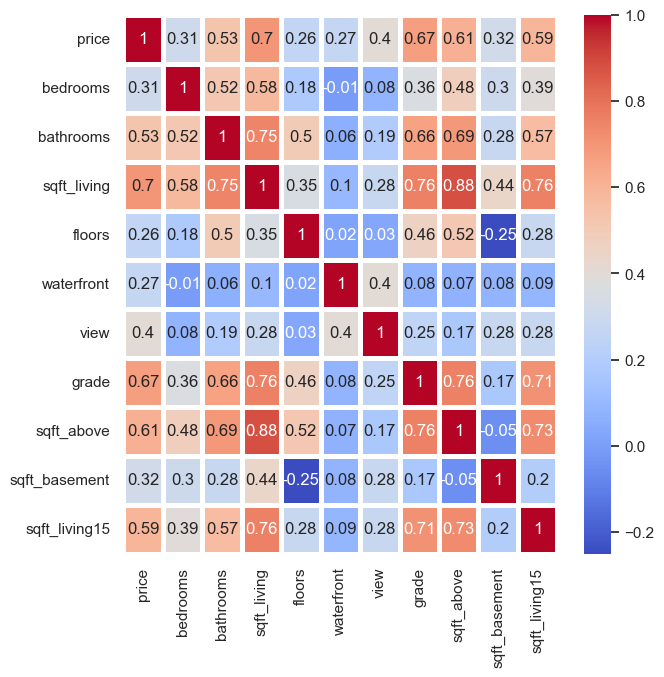

In [99]:
plt.figure(figsize=(7,7 ))

import seaborn as sns

sns.set(font_scale=1 )
sns.heatmap(corr_matrix,annot=True, linewidths=2.5, cmap='coolwarm')

для упрощения мы использовали матрицу корреляций, где была замечена максимальная взаимосвязь цены и нескольких особо влияющих факторов, а именно: bathrooms, sqft_living, sqft_above и sqft_living15

Расмотрим эти взаимосвязи на диаграммах.


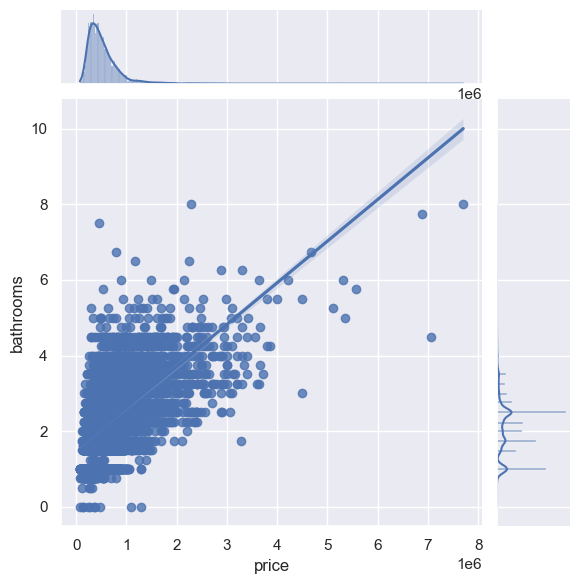

In [100]:
sns.jointplot(x=df['price'], y=df['bathrooms'], kind='reg');

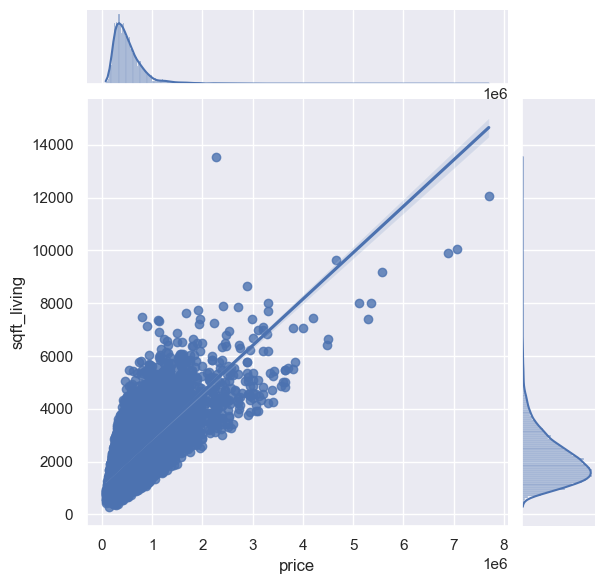

In [101]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg');

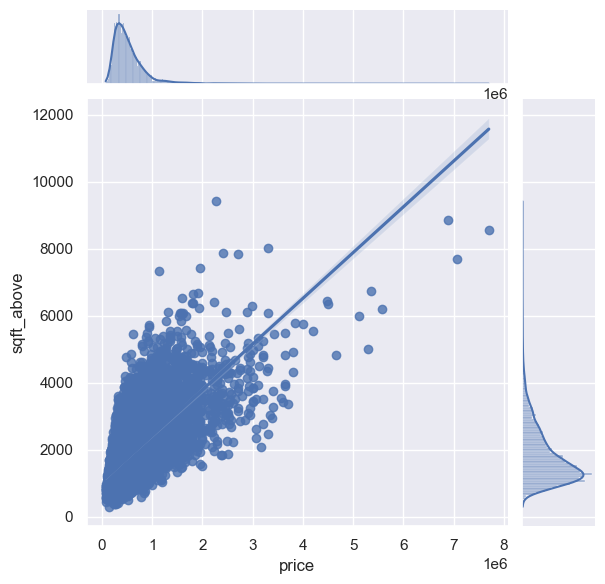

In [102]:
sns.jointplot(x=df['price'], y=df['sqft_above'], kind='reg');

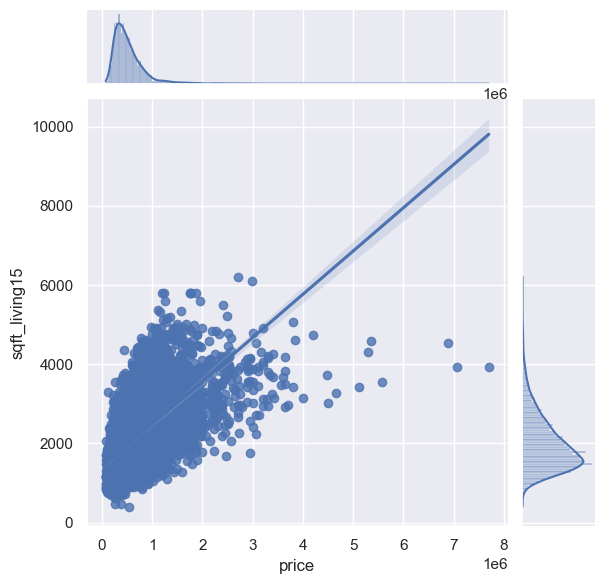

In [103]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg');